In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
df = pd.concat({
    'origin':  pd.read_csv("result/origin_solve.csv"), 
    'improve': pd.read_csv("result/improve_solve.csv"),

})
df.index.set_names(['version', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)


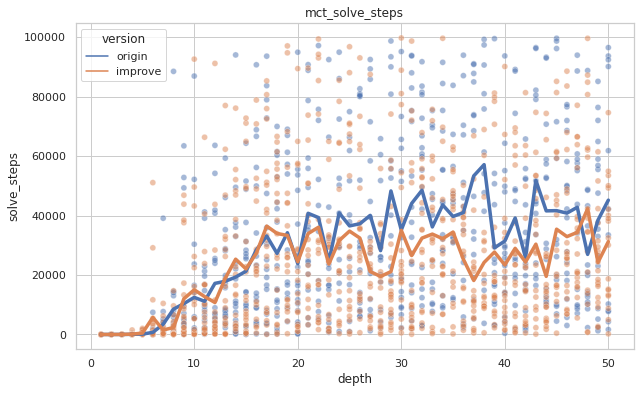

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='depth', y='solve_steps', data=df[df.is_solved == 1],hue='version',legend=None,alpha=0.5)
sns.lineplot(x='depth', y='solve_steps', data=df[df.is_solved == 1],hue='version',errorbar=None,linewidth=3.5)
plt.title('mct_solve_steps')
plt.show()

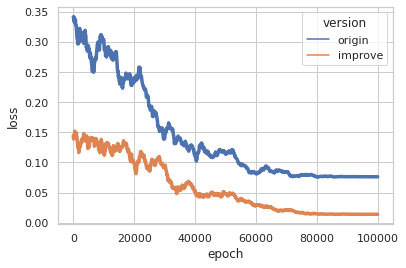

In [4]:
df_loss = pd.concat({
    'origin':  pd.read_csv("result/origin_loss.csv"), 
    'improve': pd.read_csv("result/improve_loss.csv"),

})
df_loss.index.set_names(['version', 'idx'], inplace=True)
df_loss.reset_index(level=0, inplace=True)
sns.lineplot(x='epoch', y='loss', data=df_loss,hue='version',errorbar=None,linewidth=3.5)
plt.show()

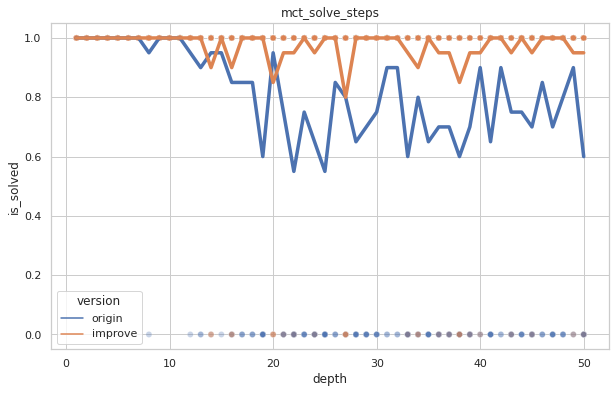

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='depth', y='is_solved', data=df,hue='version',legend=None,alpha=0.3)
sns.lineplot(x='depth', y='is_solved', data=df,hue='version',errorbar=None,linewidth=3.5)
plt.title('mct_solve_steps')
plt.show()

In [6]:
df_mct = pd.concat({
    'c=100':     pd.read_csv("result/c=100.csv"),
    'c=10':      pd.read_csv("result/c=10.csv"),
    'c=1':       pd.read_csv("result/c=1.csv"),
})
df_mct.index.set_names(['c', 'idx'], inplace=True)
df_mct.reset_index(level=0, inplace=True)

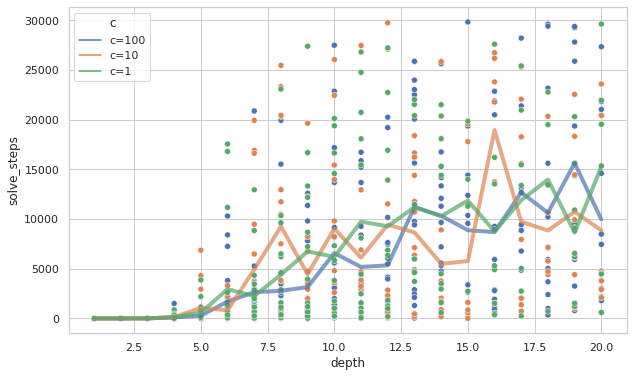

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='depth', y='solve_steps', data=df_mct[df_mct.is_solved == 1],hue='c',legend=None)
sns.lineplot(x='depth', y='solve_steps', data=df_mct[df_mct.is_solved == 1],hue='c',errorbar=None,alpha=0.7,linewidth=4)
plt.show()

<BarContainer object of 3 artists>

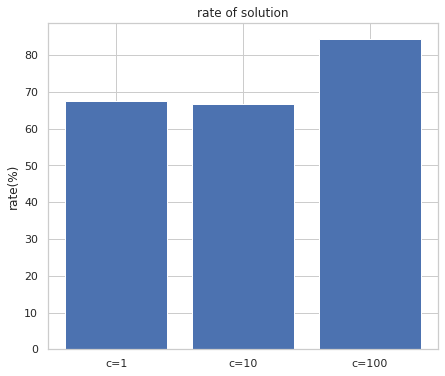

In [8]:
plt.figure(figsize=(7,6))
percentage = df_mct.groupby('c').is_solved.mean()*100
plt.title('rate of solution')
plt.ylabel('rate(%)')
plt.bar(percentage.index,percentage)

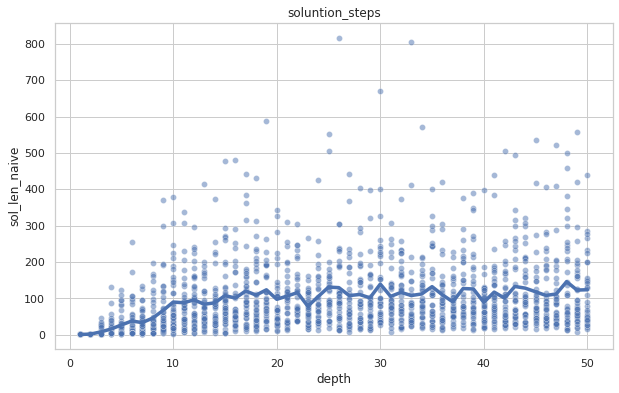

In [9]:
df_solution = df[df.version=='improve']
plt.figure(figsize=(10,6))
sns.scatterplot(x='depth', y='sol_len_naive', data=df[df.is_solved == 1],legend=None,alpha=0.5)
sns.lineplot(x='depth', y='sol_len_naive', data=df[df.is_solved == 1],errorbar=None,linewidth=3.5)
plt.title('soluntion_steps')
plt.show()

Error in steps limit, rerun tests